About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Datasets/fake-news-train.csv')

In [9]:
news_dataset.shape

(20800, 5)

In [10]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [12]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [13]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [14]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [15]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [16]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [20]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [21]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [22]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [23]:
print(Y)

[1 0 1 ... 0 1 1]


In [24]:
Y.shape

(20800,)

In [25]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [26]:
print(X)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

Splitting the dataset to training & test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [30]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9863581730769231


In [32]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


Making a Predictive System

In [34]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [35]:
print(Y_test[3])

0


label
1    10413
0    10387
Name: count, dtype: int64
Most frequent words in fake news:
[('trump', 1466), ('hillari', 1052), ('clinton', 979), ('elect', 607), ('com', 510), ('news', 443), ('new', 441), ('us', 417), ('video', 394), ('war', 361)]

Most frequent words in real news:
[('new', 6726), ('time', 6420), ('york', 6385), ('breitbart', 2752), ('trump', 2274), ('donald', 639), ('u', 477), ('michael', 438), ('john', 423), ('say', 392)]


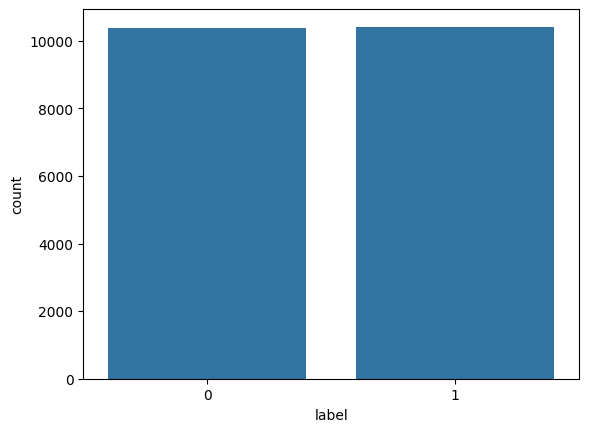

In [37]:

# You can explore the dataset further by:
# 1. Analyzing the distribution of fake vs. real news:
print(news_dataset['label'].value_counts())

# 2. Examining the most frequent words in fake and real news articles:
from collections import Counter

fake_news = news_dataset[news_dataset['label'] == 1]['content']
real_news = news_dataset[news_dataset['label'] == 0]['content']

fake_words = ' '.join(fake_news).split()
real_words = ' '.join(real_news).split()

print("Most frequent words in fake news:")
print(Counter(fake_words).most_common(10))

print("\nMost frequent words in real news:")
print(Counter(real_words).most_common(10))


# 3. Visualizing the data:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Create a bar chart of label distribution
sns.countplot(x='label', data=news_dataset)
plt.show()


# Saving the trained model:
import pickle

filename = 'fake_news_model.sav'
pickle.dump(model, open(filename, 'wb'))

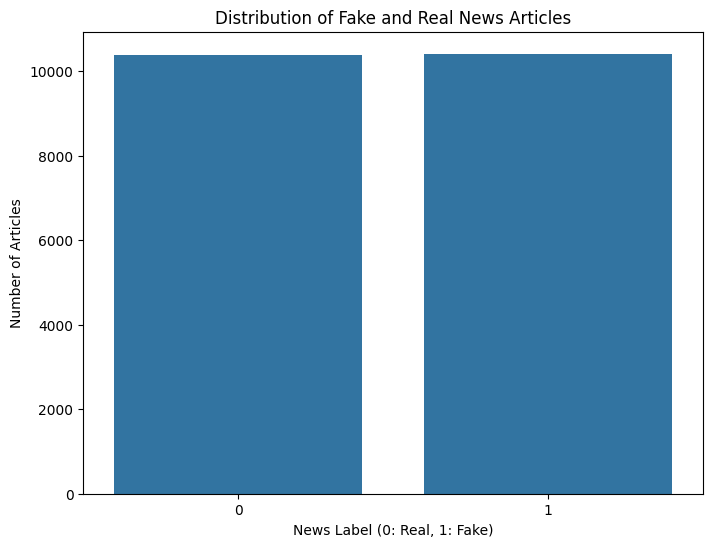

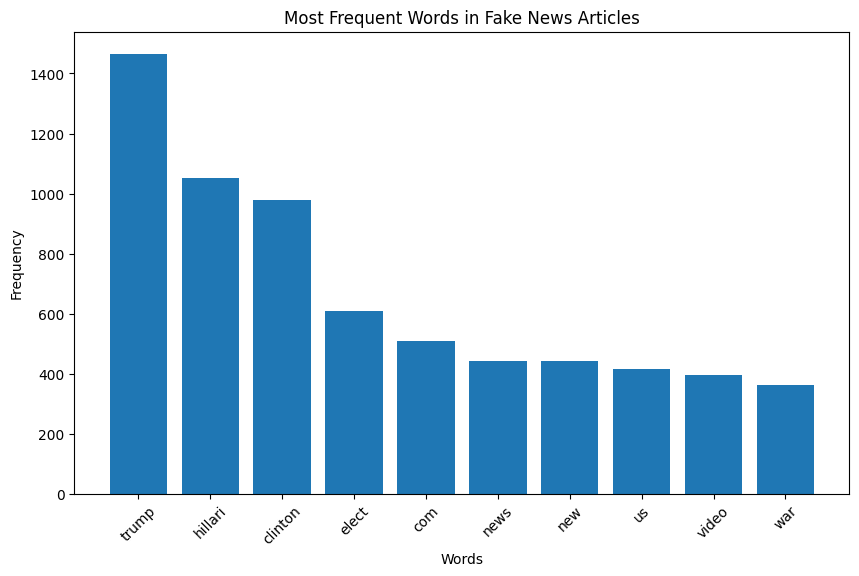

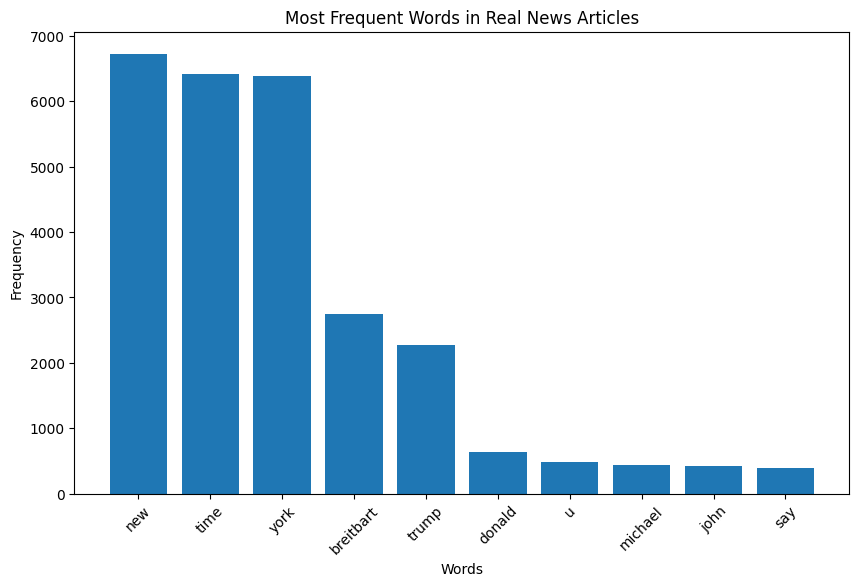

In [39]:
# Visualize the distribution of fake vs. real news articles
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news_dataset)
plt.title('Distribution of Fake and Real News Articles')
plt.xlabel('News Label (0: Real, 1: Fake)')
plt.ylabel('Number of Articles')
plt.show()

# Visualize the frequency of the most common words in fake news
fake_word_counts = Counter(fake_words).most_common(10)
words, counts = zip(*fake_word_counts)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Most Frequent Words in Fake News Articles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Visualize the frequency of the most common words in real news
real_word_counts = Counter(real_words).most_common(10)
words, counts = zip(*real_word_counts)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Most Frequent Words in Real News Articles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

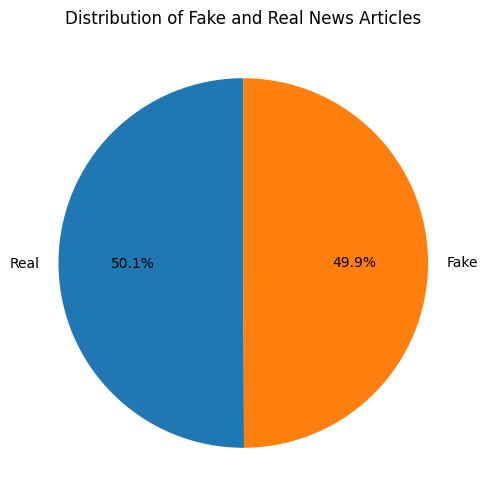

In [42]:
# Visualize the distribution of fake vs. real news articles using a pie chart
label_counts = news_dataset['label'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Real', 'Fake'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fake and Real News Articles')
plt.show()

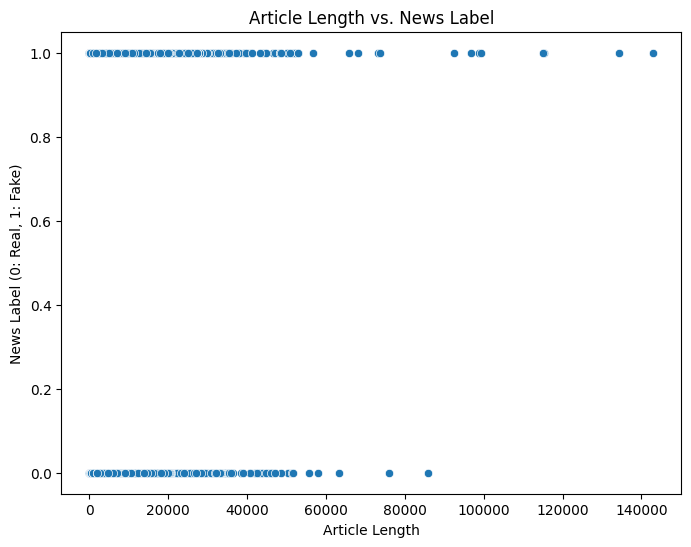

In [46]:
# Create a scatter plot of article length vs. label (real/fake)
news_dataset['article_length'] = news_dataset['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='article_length', y='label', data=news_dataset)
plt.title('Article Length vs. News Label')
plt.xlabel('Article Length')
plt.ylabel('News Label (0: Real, 1: Fake)')
plt.show()

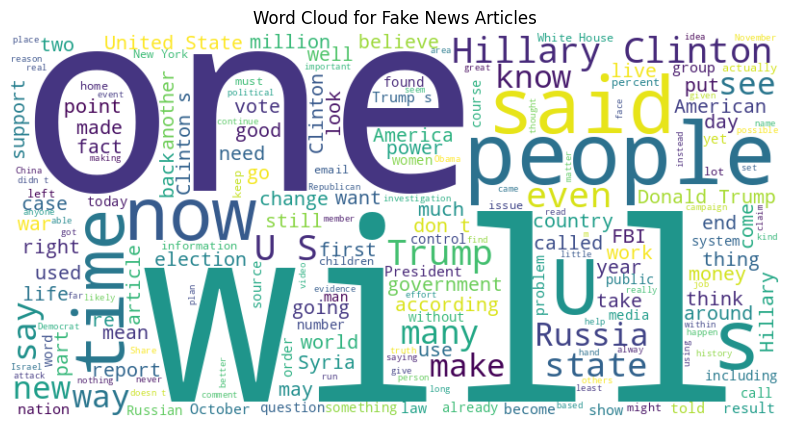

In [48]:
# Create a word cloud for fake news articles
from wordcloud import WordCloud

fake_news_text = ' '.join(news_dataset[news_dataset['label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News Articles')
plt.show()

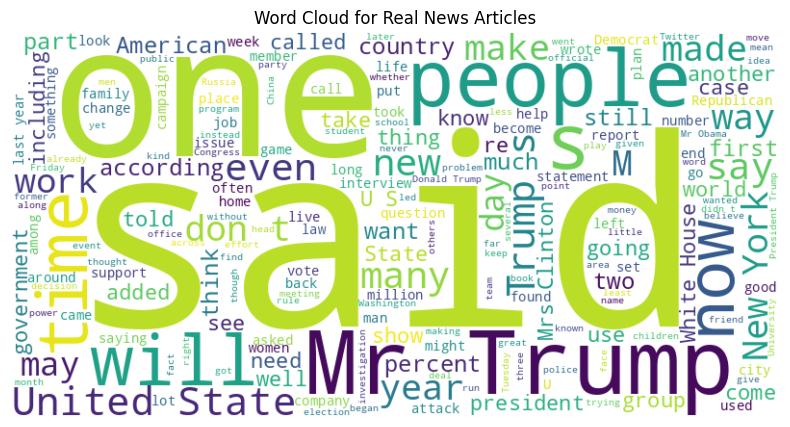

In [49]:
# Create a word cloud for real news articles
real_news_text = ' '.join(news_dataset[news_dataset['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_news_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News Articles')
plt.show()